# Test: XArray with OPeNDAP Data
Retrieve OPeNDAP data with xarray. 


In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import xarray as xr
import numpy as np

The dataset URL we use for this test resferences a dmr++ file hosted on an Amazon EC2 instance Running Hyrax. THe dmr++ file references (is backed by) an associated data object (in this case an hdf5 file) in S3.

In [5]:
dataset_url = 'dap4://t41m1.opendap.org:8080/opendap/dmrpp_from_aws_cli/airs/AIRS.2015.01.01.L3.RetStd_IR001.v6.0.11.0.G15013155825.nc.h5.dmrpp'

# Temporary URL. jhrg 6/6/23

dataset_url = 'dap4://test.opendap.org/opendap/tutorials/20220812010000-OSISAF-L3C_GHRSST-SSTsubskin-GOES16-ssteqc_goes16_20220812_010000-v02.0-fv01.0.nc'


Next we open the dataset with xarray, `xr.open_dataset()`, and then show the metadata

In [6]:
remote_data = xr.open_dataset(dataset_url)
remote_data

<xarray.Dataset>
Dimensions:                    (time: 1, lat: 2400, lon: 2400)
Coordinates:
  * time                       (time) datetime64[ns] 2022-08-12T01:00:00
  * lat                        (lat) float32 -59.97 -59.92 ... 59.92 59.97
  * lon                        (lon) float32 -135.0 -134.9 ... -15.07 -15.02
Data variables: (12/16)
    sea_surface_temperature    (time, lat, lon) float32 ...
    sst_dtime                  (time, lat, lon) timedelta64[ns] ...
    sses_bias                  (time, lat, lon) float32 ...
    sses_standard_deviation    (time, lat, lon) float32 ...
    dt_analysis                (time, lat, lon) float32 ...
    wind_speed                 (time, lat, lon) float32 ...
    ...                         ...
    l2p_flags                  (time, lat, lon) int32 ...
    quality_level              (time, lat, lon) float32 ...
    satellite_zenith_angle     (time, lat, lon) float32 ...
    solar_zenith_angle         (time, lat, lon) float32 ...
    or_latitude                (time, lat, lon) float32 ...
    or_longitude               (time, lat, lon) float32 ...

Then we select a variable and read it's values:

In [7]:
# ClrOLR_A = remote_data['ClrOLR_A'][::1,::1]
SST = remote_data['sea_surface_temperature'][::1,::1,::1]

In [8]:
# ClrOLR_A
SST

<xarray.DataArray 'sea_surface_temperature' (time: 1, lat: 2400, lon: 2400)>
[5760000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2022-08-12T01:00:00
  * lat      (lat) float32 -59.97 -59.92 -59.88 -59.83 ... 59.88 59.92 59.97
  * lon      (lon) float32 -135.0 -134.9 -134.9 -134.8 ... -15.12 -15.07 -15.02
Attributes:
    long_name:       sea surface subskin temperature
    standard_name:   sea_surface_subskin_temperature
    units:           kelvin
    valid_min:       -300
    valid_max:       4500
    depth:           1 millimeter
    source:          GOES_Imager
    comment:         Temperature of the subskin of the ocean
    _edu.ucar.maps:  ['/time', '/lat', '/lon']

And finally plot the selected variable.

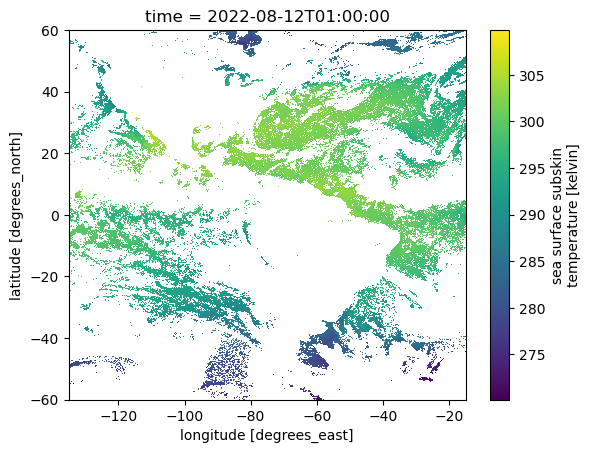

In [9]:
# ClrOLR_A.plot()
SST.plot()